In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

#### Data Import

In [67]:
consumption=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 13/Electricity Consumption.csv')
consumption1=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 13/Electricity Consumption.csv')

In [68]:
consumption.isna().sum()

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [69]:
consumption.columns=['Date', 'Consumption']
consumption['Date'] = pd.to_datetime(consumption['Date'])
consumption.set_index('Date', inplace=True) #set date as index

In [70]:
consumption

,Consumption
Date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


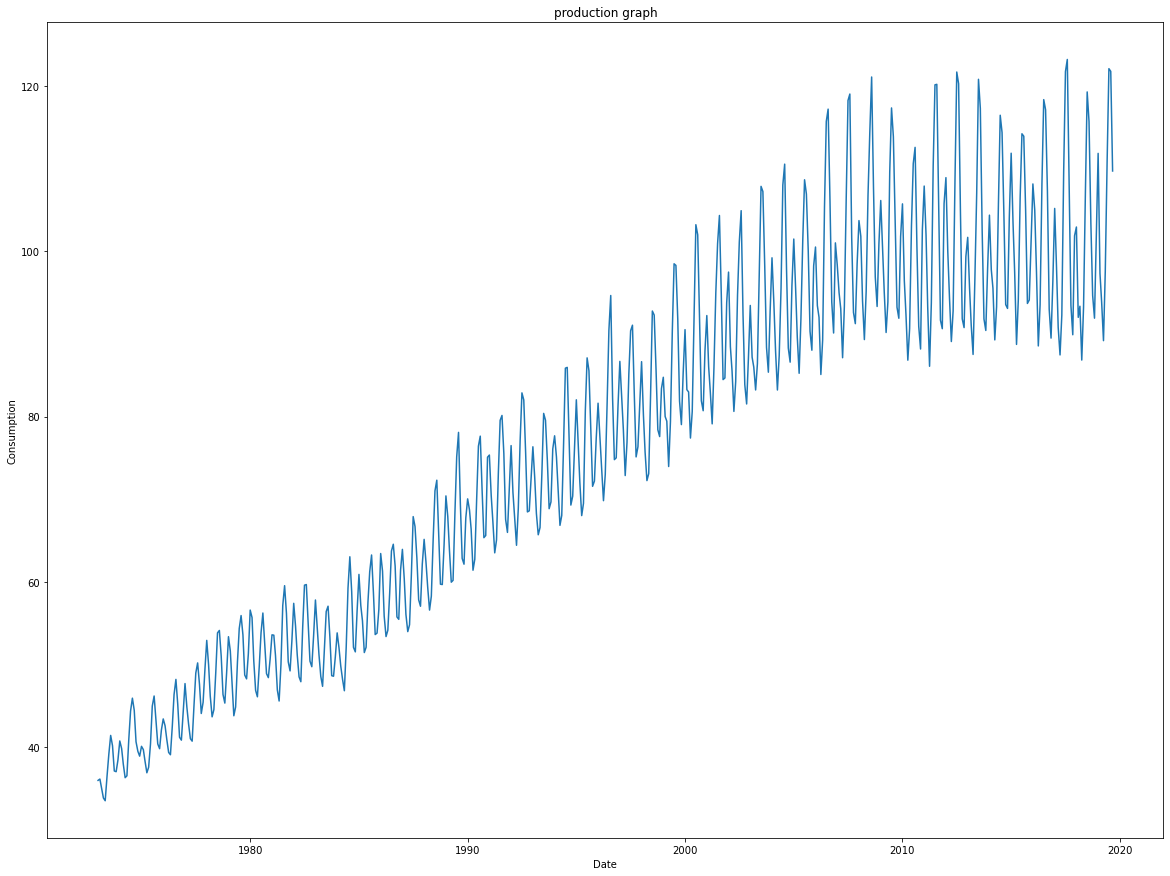

In [71]:
plt.figure(figsize=(20,15))
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("production graph")
plt.plot(consumption)

### 1.Decomposition

In [72]:
sm.tsa.seasonal_decompose

<function statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)>

In [73]:
decomposition = sm.tsa.seasonal_decompose(consumption, model='multiplicative',two_sided=False, extrapolate_trend=4)

In [74]:
decomposition.resid.head()


Date
1973-01-01    1.000731
1973-02-01    1.055266
1973-03-01    1.070096
1973-04-01    1.087913
1973-05-01    1.036710
Name: resid, dtype: float64

In [75]:
decomposition.seasonal.head()

Date
1973-01-01    1.054397
1973-02-01    0.996618
1973-03-01    0.946374
1973-04-01    0.891631
1973-05-01    0.919530
Name: seasonal, dtype: float64

In [76]:
decomposition.trend.head()

Date
1973-01-01    34.092018
1973-02-01    34.357224
1973-03-01    34.622430
1973-04-01    34.887636
1973-05-01    35.152842
Name: trend, dtype: float64

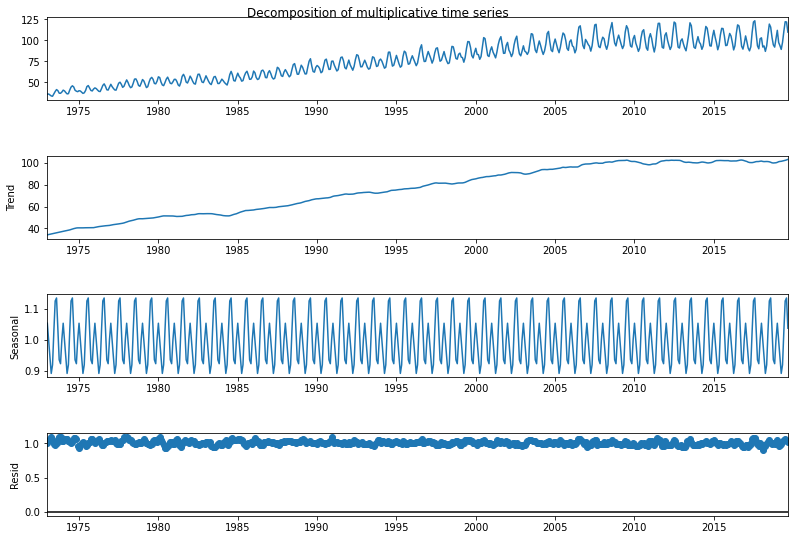

In [77]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [78]:
decomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))

In [79]:
decomp_output.columns = ['observed', 'Trend', 'Seasonal', 'Irregular']

In [80]:
decomp_output.head()

,observed,Trend,Seasonal,Irregular
Date,,,,
1973-01-01,35.9728,34.092018,1.054397,1.000731
1973-02-01,36.1334,34.357224,0.996618,1.055266
1973-03-01,35.0625,34.622430,0.946374,1.070096
1973-04-01,33.8416,34.887636,0.891631,1.087913
1973-05-01,33.5107,35.152842,0.919530,1.036710


In [81]:
decomp_output['TSI'] = decomp_output.Trend*decomp_output.Seasonal*decomp_output.Irregular

In [82]:
decomp_output.head()

,observed,Trend,Seasonal,Irregular,TSI
Date,,,,,
1973-01-01,35.9728,34.092018,1.054397,1.000731,35.9728
1973-02-01,36.1334,34.357224,0.996618,1.055266,36.1334
1973-03-01,35.0625,34.622430,0.946374,1.070096,35.0625
1973-04-01,33.8416,34.887636,0.891631,1.087913,33.8416
1973-05-01,33.5107,35.152842,0.919530,1.036710,33.5107


### We can use Moving Average to make the data deseasonlized

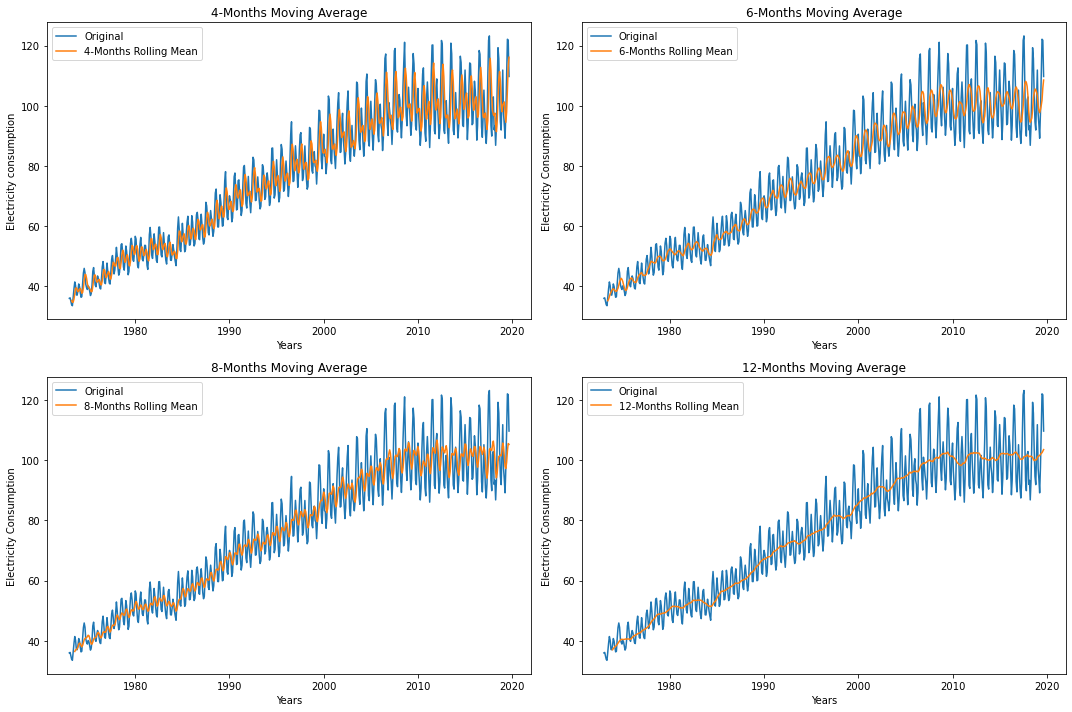

In [83]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(15)
fig.set_figheight(10)

axes[0][0].plot(consumption.index, consumption, label='Original')
axes[0][0].plot(consumption.index, consumption.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Electricity consumption")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(consumption.index, consumption, label='Original')
axes[0][1].plot(consumption.index, consumption.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Electricity Consumption")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(consumption.index, consumption, label='Original')
axes[1][0].plot(consumption.index, consumption.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Electricity Consumption")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(consumption.index, consumption, label='Original')
axes[1][1].plot(consumption.index, consumption.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Electricity Consumption")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

### Seasonality

In [84]:
#We will plot a stacked annual plot to observe seasonality in our data.

In [85]:
consumption1['DATE']=consumption1['DATE'].apply(lambda x: pd.to_datetime(x,format="%m/%d/%Y"))

In [86]:
consumption1['MONTH']=consumption1['DATE'].apply(lambda x:pd.Timestamp.strftime(x,format='%b'))

In [87]:
consumption1['YEAR']=consumption1['DATE'].apply(lambda x:pd.Timestamp.strftime(x,format='%Y'))

In [88]:
consumption1.head()

,DATE,Electricty_Consumption_in_TW,MONTH,YEAR
0,1973-01-01,35.9728,Jan,1973
1,1973-02-01,36.1334,Feb,1973
2,1973-03-01,35.0625,Mar,1973
3,1973-04-01,33.8416,Apr,1973
4,1973-05-01,33.5107,May,1973


In [89]:
monthly = pd.pivot_table(data=consumption1,values='Electricty_Consumption_in_TW',index='MONTH',columns='YEAR')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [90]:
monthly

YEAR,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
MONTH,,,,,,,,,,,,,,,,,,,,,
Jan,35.9728,40.7455,40.0956,43.4099,47.6892,52.9153,53.3617,56.5838,53.5867,57.4002,...,105.7413,107.8967,108.9151,101.6890,104.3752,111.8708,108.1515,105.1879,102.9398,111.8520
Feb,36.1334,39.8340,39.6944,42.5826,44.8505,49.9488,51.6279,55.6802,53.5461,54.6248,...,96.4428,101.9572,100.0117,95.5366,97.7907,103.4990,104.9900,98.0069,92.0095,97.3261
Mar,35.0625,37.9408,38.3040,40.9244,42.8557,46.1749,47.8264,50.4428,51.0708,51.1896,...,92.2986,93.2285,94.3484,91.0434,95.5280,97.4134,97.5969,90.8029,93.3526,93.8406
Apr,33.8416,36.3004,36.8939,39.3533,41.0177,43.6652,43.7935,46.8693,46.9172,48.4958,...,86.8242,86.0874,89.0821,87.5189,89.2783,88.7323,88.5477,87.4594,86.8386,89.1873
May,33.5107,36.5293,37.5668,39.0766,40.7201,44.5402,44.8591,46.0886,45.5795,47.9140,...,90.6389,93.7706,92.7937,96.5166,93.2729,94.1360,93.5168,92.2811,93.2361,97.5860
Jun,36.4823,40.8899,40.3832,42.4851,45.0610,48.9480,50.3292,49.7595,50.0235,54.5292,...,103.0377,110.3572,108.5421,107.0627,105.7336,106.5504,108.1813,109.6104,107.1009,110.8580
Jul,39.1412,44.3563,44.9671,46.3693,48.9685,53.8292,54.3579,53.8273,57.1384,59.5975,...,110.6045,120.1457,121.6974,120.8149,116.4651,114.2235,118.3568,121.7478,119.2874,122.1014
Aug,41.4137,45.9240,46.1853,48.1945,50.1898,54.1182,55.9197,56.2272,59.5376,59.6727,...,112.5792,120.2087,120.2822,117.2932,114.3700,113.9230,117.1375,123.2163,115.7108,121.7765
Sep,40.1639,44.4555,43.3001,45.1688,47.5982,50.9980,53.5776,52.5737,56.1935,54.9644,...,100.4701,106.1109,104.6692,102.4185,104.3899,104.9454,107.3046,108.4514,103.4070,109.7190


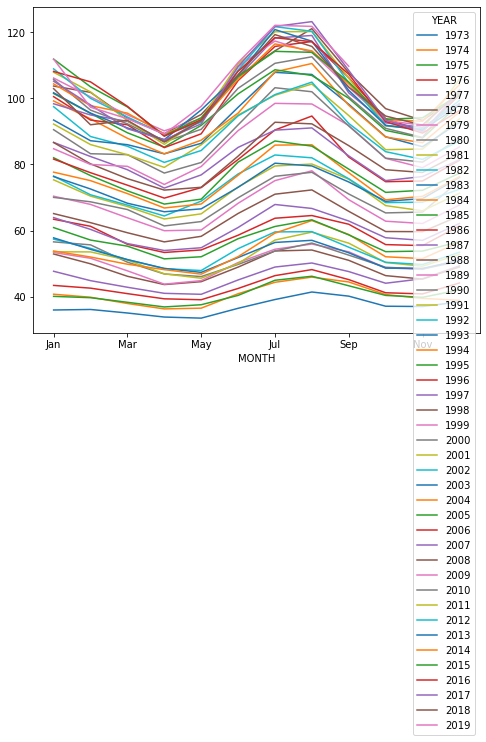

In [91]:
monthly.plot(figsize=(8,6))
plt.show()

In [92]:
yearly = pd.pivot_table(data=consumption1,values='Electricty_Consumption_in_TW',index='YEAR',columns='MONTH')
yearly=yearly[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [93]:
yearly.head()

MONTH,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
YEAR,,,,,,,,,,,,
1973,35.9728,36.1334,35.0625,33.8416,33.5107,36.4823,39.1412,41.4137,40.1639,37.1133,37.0248,38.4341
1974,40.7455,39.8340,37.9408,36.3004,36.5293,40.8899,44.3563,45.9240,44.4555,40.6417,39.4901,38.9068
1975,40.0956,39.6944,38.3040,36.8939,37.5668,40.3832,44.9671,46.1853,43.3001,40.3836,39.8092,42.0597
1976,43.4099,42.5826,40.9244,39.3533,39.0766,42.4851,46.3693,48.1945,45.1688,41.1880,40.8431,44.1468
1977,47.6892,44.8505,42.8557,41.0177,40.7201,45.0610,48.9685,50.1898,47.5982,44.0684,45.4267,49.3447


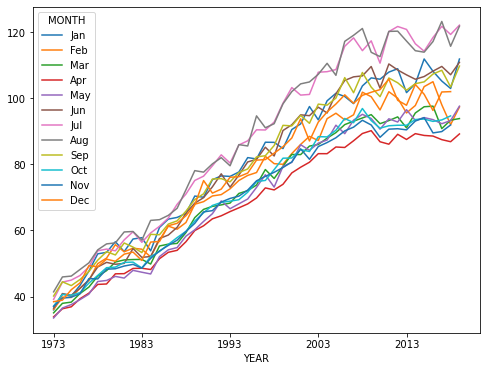

In [94]:
yearly.plot(figsize=(8,6))
plt.show()

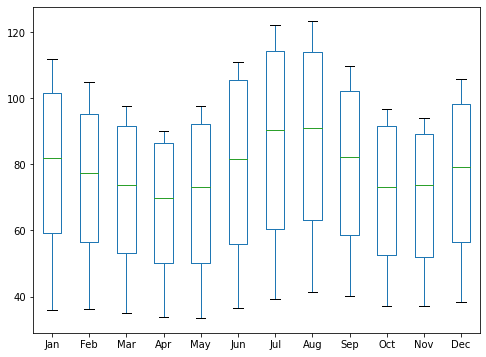

In [95]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

#### Important Inferences


In [96]:
#Demand is incrasing every year
#JUNE,JULY and August are the peak months for passengers.

### 3.ARIMA Modelling
ARIMA is a combination of 3 parts i.e. AR (AutoRegressive), I (Integrated), and MA (Moving Average)

### Dickey-Fuller Test
Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [97]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

In [98]:
adfuller(consumption)

(-1.7405933729832443,
 0.41032816044686793,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [99]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(consumption)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.740593
p-value                          0.410328
#lags Used                      15.000000
Number of Observations Used    545.000000
Critical Value (1%)             -3.442406
Critical Value (5%)             -2.866858
Critical Value (10%)            -2.569602
dtype: float64


In [100]:
#since we have high p-value we can try to use log of consumption and check the p-value to 
#to see if data becomes stationary

In [101]:
consumtion_log = np.log10(consumption)

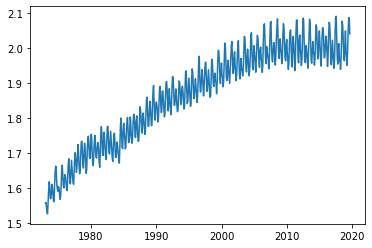

In [102]:
plt.plot(consumtion_log)

In [103]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(consumtion_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.001867
p-value                          0.034720
#lags Used                      15.000000
Number of Observations Used    545.000000
Critical Value (1%)             -3.442406
Critical Value (5%)             -2.866858
Critical Value (10%)            -2.569602
dtype: float64


In [104]:
#The p-value is still little less than 0.05 (Coinfidence Interval 95%).
#The log transformation has made variance stationary but mean is still increasing.
#Let's try differencing by 1.

In [105]:
consumtion_log_diff1 = consumtion_log.diff(1)
consumtion_log_diff1.dropna(inplace=True)

In [106]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(consumtion_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.884810e+00
p-value                        1.403418e-09
#lags Used                     1.400000e+01
Number of Observations Used    5.450000e+02
Critical Value (1%)           -3.442406e+00
Critical Value (5%)           -2.866858e+00
Critical Value (10%)          -2.569602e+00
dtype: float64


<AxesSubplot:xlabel='Date'>

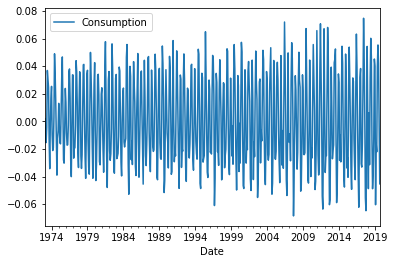

In [107]:
consumtion_log_diff1.plot()

In [108]:
#p-value is less than 0.05. 
#In this case we reject null hypothesis that TS is non stationary.

### ARIMA Model

In [109]:
from statsmodels.tsa.arima.model import ARIMA

In [110]:
# initiate and fit model using randome order values of p,d,q
model = ARIMA(consumtion_log, order=(2,2,1))
model_fit = model.fit()

In [111]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                  561
Model:                 ARIMA(2, 2, 1)   Log Likelihood                1378.594
Date:                Tue, 28 Dec 2021   AIC                          -2749.188
Time:                        11:53:06   BIC                          -2731.884
Sample:                    01-01-1973   HQIC                         -2742.431
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7413      0.032     22.934      0.000       0.678       0.805
ar.L2         -0.7155      0.031    -23.273      0.000      -0.776      -0.655
ma.L1         -0.9998      0.213     -4.694      0.0

### Calculating ERROR values for past 1 year for ARIMA model

In [184]:
pred_dynamic1 = model_fit.get_prediction(start=pd.to_datetime('2018-09-01'), full_results=True)

In [185]:
pred_dynamic1.predicted_mean

2018-09-01    2.020950
2018-10-01    1.988665
2018-11-01    1.983384
2018-12-01    1.982177
2019-01-01    2.052025
2019-02-01    2.046859
2019-03-01    1.915484
2019-04-01    2.004702
2019-05-01    1.945991
2019-06-01    2.034972
2019-07-01    2.058682
2019-08-01    2.079075
2019-09-01    2.055578
Freq: MS, Name: predicted_mean, dtype: float64

In [190]:
forecast_1 = np.power(10,pred_dynamic1.predicted_mean)
actual_1 = consumption['2018-09-01':]['Consumption']

In [191]:
MAPE_last1year = np.mean(np.abs(actual_1 - forecast_1)/actual_1)

In [192]:
print('The Mean Absolute percentage error of our forecast for last one years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last one years is 0.0607


In [193]:
# Compute the mean square error
mse = ((actual_1 - forecast_1) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 54.41
The ROOT Mean Squared Error of our forecasts is 7.37631344236401


### Forecasting using Arima model for next 2 years

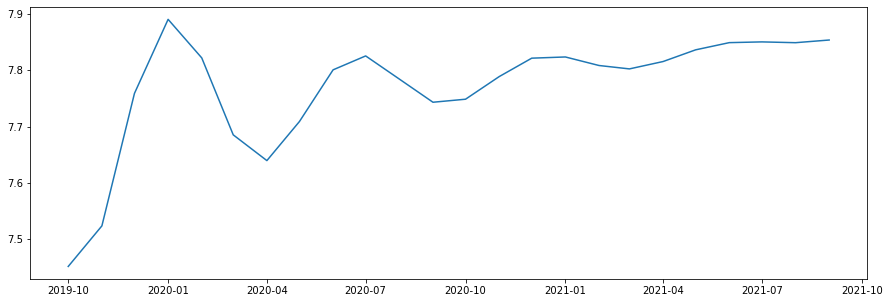

In [112]:
### Forecasting for the next 24 Time Period
plt.figure(figsize=(15,5))
plt.plot(np.exp(model_fit.forecast(24)))

### SARIMA model

### To run SARIMA by using a loop and let it find the best values of p,d,q and the Seasonality order P,D,Q
(Kind of like a manually created Grid Search - Hyper Parameter Tuning)

In [116]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(2,3)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [117]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [118]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(consumtion_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(2, 2, 2)x(1, 0, 1, 12)12 model - AIC:-3544.1834858972697


In [119]:
best_model = sm.tsa.statespace.SARIMAX(consumtion_log,
                                      order=(2, 2, 2),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

### Performing forecasting visually

In [120]:
# Get forecast 24 steps (2 years) ahead in future
n_steps = 24
pred_uc_99 = best_results.get_forecast(steps=24, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=24, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [122]:
n_steps = 24
idx = pd.date_range(consumption.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [129]:
np.power(10, pred_uc_95.predicted_mean)

2019-10-01     96.528636
2019-11-01     93.892290
2019-12-01    104.189598
2020-01-01    110.463788
2020-02-01    101.399167
2020-03-01     96.704602
2020-04-01     90.373889
2020-05-01     96.616513
2020-06-01    111.538279
2020-07-01    123.281612
2020-08-01    122.485776
2020-09-01    109.140033
2020-10-01     96.192738
2020-11-01     93.849838
2020-12-01    104.318639
2021-01-01    110.612306
2021-02-01    101.414125
2021-03-01     96.660700
2021-04-01     90.271098
2021-05-01     96.558734
2021-06-01    111.607491
2021-07-01    123.458289
2021-08-01    122.641515
2021-09-01    109.152731
Freq: MS, Name: predicted_mean, dtype: float64

In [123]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2019-09-01,96.528636,92.684510,100.532199,92.684510,100.532199
2019-10-01,93.892290,89.101111,98.941102,89.101111,98.941102
2019-11-01,104.189598,98.455265,110.257916,98.455265,110.257916
2019-12-01,110.463788,104.091112,117.226614,104.091112,117.226614
2020-01-01,101.399167,95.267244,107.925775,95.267244,107.925775


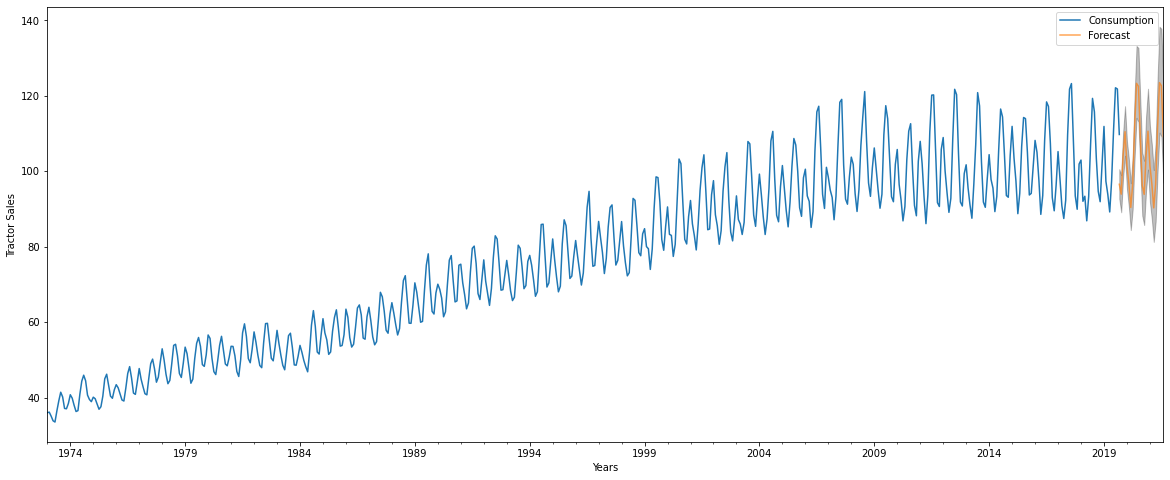

In [126]:
# plot the forecast along with the confidence band
axis = consumption.plot(label='Observed', figsize=(20, 8))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

#### To Get the MAPE for past 1 year data for SARIMA model

In [172]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2018-09-01'), full_results=True)
pred_dynamic.predicted_mean

2018-09-01    2.013364
2018-10-01    1.960391
2018-11-01    1.964224
2018-12-01    2.004088
2019-01-01    2.028453
2019-02-01    2.011541
2019-03-01    1.965562
2019-04-01    1.945774
2019-05-01    1.976768
2019-06-01    2.048285
2019-07-01    2.084424
2019-08-01    2.083208
2019-09-01    2.034751
Freq: MS, Name: predicted_mean, dtype: float64

In [176]:
forecast = np.power(10,pred_dynamic.predicted_mean)
actual = consumption['2018-09-01':]['Consumption']

In [178]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)
print('The Mean Absolute percentage error of our forecast for last one years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.0182


In [180]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 6.2732
The ROOT Mean Squared Error of our forecasts is 2.5046357020532946


#### Inference

In [195]:
#We will use SARIMA model since it gives low value of errors for prediction for past 1year
#as well as gives less amount of flutautions in forecasted data